In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from feature_engineering_helpers import *

plt.style.use('ggplot')

In [2]:
price_df = pd.read_csv('./data/price_data.csv')
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


## Price difference between the start (jan) and end (dec) of the period

Hypothesis: If the price has increased too much, the customer will think about churning.

In [26]:
# Get price by month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).mean().reset_index()
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Difference
assert jan_prices.shape == dec_prices.shape
diff = dec_prices.set_index('id') - jan_prices.set_index('id')
diff.drop('price_date', axis=1, inplace=True)
diff.columns = [f'abs_change_{col}' for col in diff.columns]
diff = diff.reset_index()
diff.head()

,id,abs_change_price_off_peak_var,abs_change_price_peak_var,abs_change_price_mid_peak_var,abs_change_price_off_peak_fix,abs_change_price_peak_fix,abs_change_price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,-0.006192,-0.002302,0.003487,0.162916,0.097749,0.065166
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.000000,0.000000,0.177779,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,0.000000,0.000000,1.500000,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,-0.005120,0.000763,0.162916,0.097749,0.065166
4,00114d74e963e47177db89bc70108537,-0.003994,0.000000,0.000000,-0.000001,0.000000,0.000000


In [39]:
# Compute correlation with churn
client_df = pd.read_csv('./data/client_data.csv')
client_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


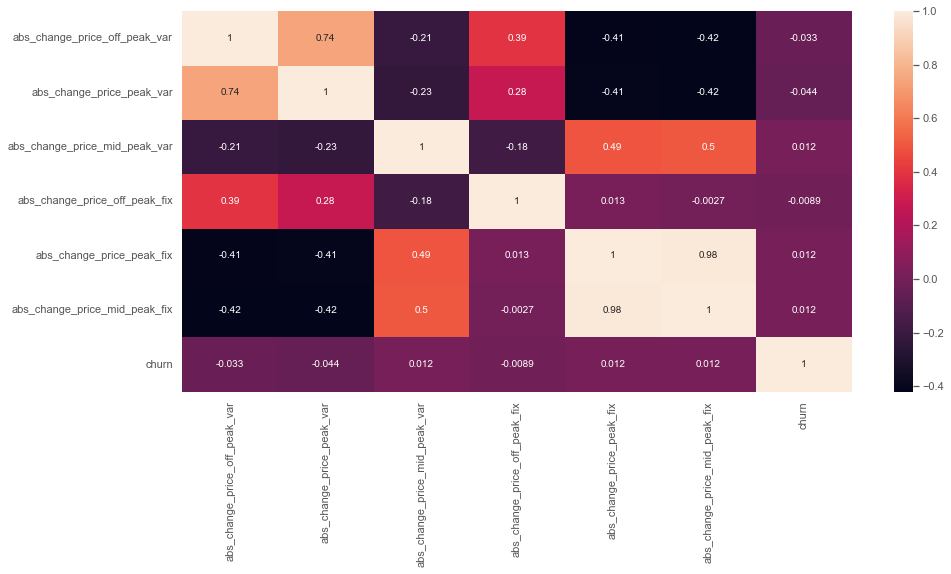

In [40]:
feature_correlation(diff, client_df)

In [30]:
diff_relative = (dec_prices.set_index('id').drop('price_date', axis=1) - jan_prices.set_index('id').drop('price_date', axis=1) / jan_prices.set_index('id').drop('price_date', axis=1)).dropna()
# diff_relative.drop('price_date', axis=1, inplace=True)
diff_relative.columns = [f'rel_change_{col}' for col in diff_relative.columns]
diff_relative = diff_relative.reset_index()
diff_relative.head()

,id,rel_change_price_off_peak_var,rel_change_price_peak_var,rel_change_price_mid_peak_var,rel_change_price_off_peak_fix,rel_change_price_peak_fix,rel_change_price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,-0.880094,-0.898327,-0.926281,39.728885,23.43733,15.291555
1,0010ee3855fdea87602a5b7aba8e42de,-0.886932,-0.904615,-0.930591,39.728885,23.43733,15.291555
2,00126c87cf78d7604278f0a9adeb689e,-0.886932,-0.904615,-0.930591,39.728885,23.43733,15.291555
3,0013f326a839a2f6ad87a1859952d227,-0.878353,-0.896587,-0.924540,39.728885,23.43733,15.291555
4,001987ed9dbdab4efa274a9c7233e1f4,-0.881825,-0.899509,-0.925484,39.728885,23.43733,15.291555


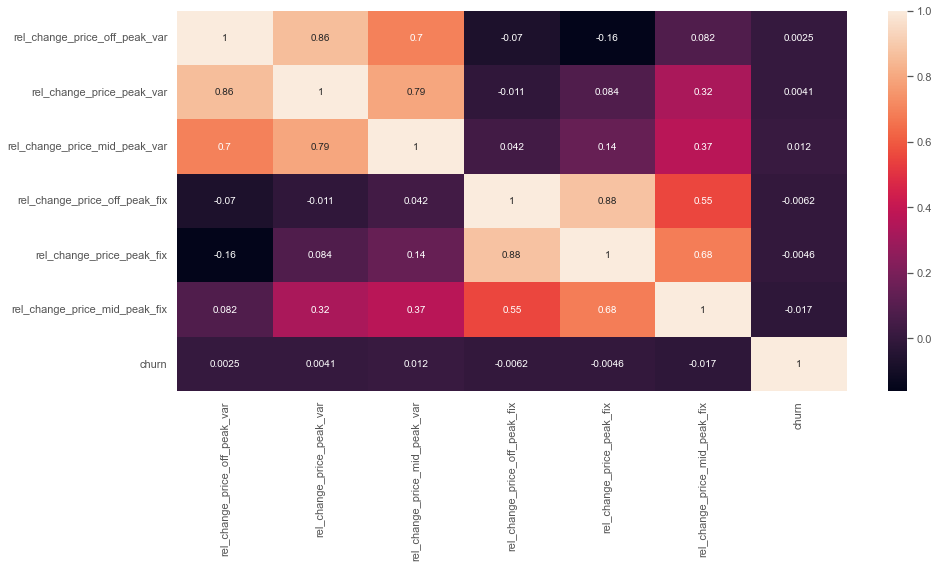

In [38]:
feature_correlation(diff_relative, client_df)

## Price variation

Hypothesis: Varying prices can make cost control for customer become more difficult,
resulting in churn.

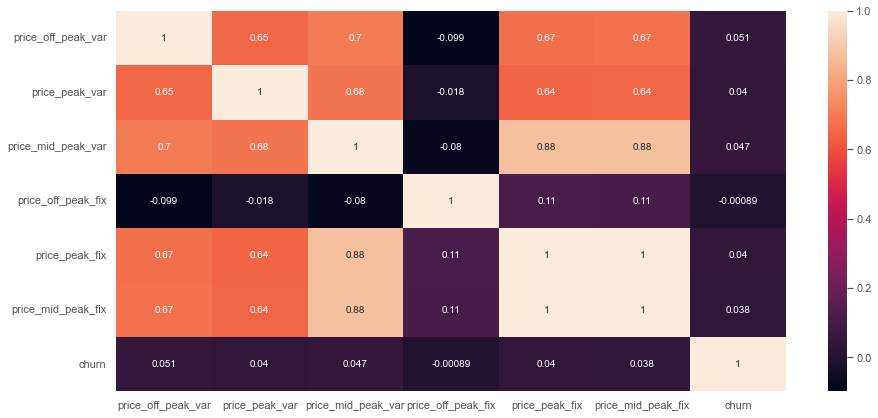

In [36]:
feature_correlation(price_df.drop('price_date', axis=1).groupby('id', as_index=False).std(), client_df)

## Conclusion

Price-based features have weak correlation with churn. Therefore it is unlikely for our
hypothesis that price changes affect customer churn to be true. However, we still need
to build a predictive model, and we still haven't done any feature engineering for
non-price features. 

Therefore, feature engineering will be done in a separate script.